# Importing Neccessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Knowing about classes

In [2]:
#PATH ALLOCATION
data_dir=os.path.join('data')
classes=os.listdir(data_dir)
classes

['Africanized Honey Bees (Killer Bees)',
 'Anaphe reticulata',
 'Anomis sabulifera',
 'Ants',
 'Aphids',
 'Apion corchori',
 'Armyworms',
 'Beet Armyworm',
 'Beetle',
 'Black Hairy',
 'Bollworm',
 'Brown Marmorated Stink Bugs',
 'Cabbage Loopers',
 'Catterpillar',
 'Citrus Canker',
 'Colorado Potato Beetles',
 'Corn borer',
 'Corn Earworms',
 'Cutworm',
 'Earwig',
 'Fall Armyworms',
 'Field Cricket',
 'Flea beetle',
 'Fruit Flies',
 'Gall midge',
 'Grasshopper',
 'Grub',
 'Hornworms',
 'Jute Hairy',
 'Leaf Beetle',
 'Leafhopper',
 'Mealybug',
 'Miridae',
 'Mosquito',
 'Moth',
 'Pod Borer',
 'Red Mite',
 'Sawfly',
 'Scopula Emissaria',
 'Slug',
 'Snail',
 'Spider Mites',
 'Stem maggot',
 'Stem_borer',
 'Termite',
 'Termite odontotermes',
 'Thrips',
 'Wasp',
 'Weevil',
 'Western Corn Rootworms',
 'Wireworm',
 'Yellow Mite']

# Data Preprocessing

# 1. Cleaning The Data

In [3]:
#REMOVING DOGGY IMAGES
import cv2
import imghdr                                                                                                                            #cv2 uses BGR,matplotlib uses RGB
img_ext=['jpeg','jpg','png','bmp']                                              

for img_c in classes:
    for img_v in os.listdir(os.path.join('data',img_c)):
        img_p=os.path.join('data',img_c,img_v)
        try:
            img_mat=cv2.imread(img_p)
            img_tip=imghdr.what(img_p)
            if(img_tip not in img_ext):
                print('Image not in ext list {}'.format(img_p))
                os.remove(img_p)
            
        except Exception as e:
            #print('Issue with image {}'.format(img_p))
            print(e)
                

# Load and preprocess data from subfolders

In [4]:
# Load and preprocess data from subfolders

def load_data(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    for class_index, class_name in enumerate(class_names):
        class_path = os.path.join(folder, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            # Convert the color space from BGR to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (256,256))
            images.append(image)
            labels.append(class_index)
    return images, labels

# Load and preprocess image data
images, labels = load_data('data')

# Splitting the data For Train & Test

In [5]:
# Split data into train and test sets
train_images, val_images, train_labels, val_labels = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Convert lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Normalize pixel values to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
val_images = val_images.astype('float32') / 255.0

# Print shapes for verification
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:",val_labels.shape)

Train images shape: (4097, 256, 256, 3)
Train labels shape: (4097,)
Validation images shape: (1025, 256, 256, 3)
Validation labels shape: (1025,)


# Visualizing the Train Images

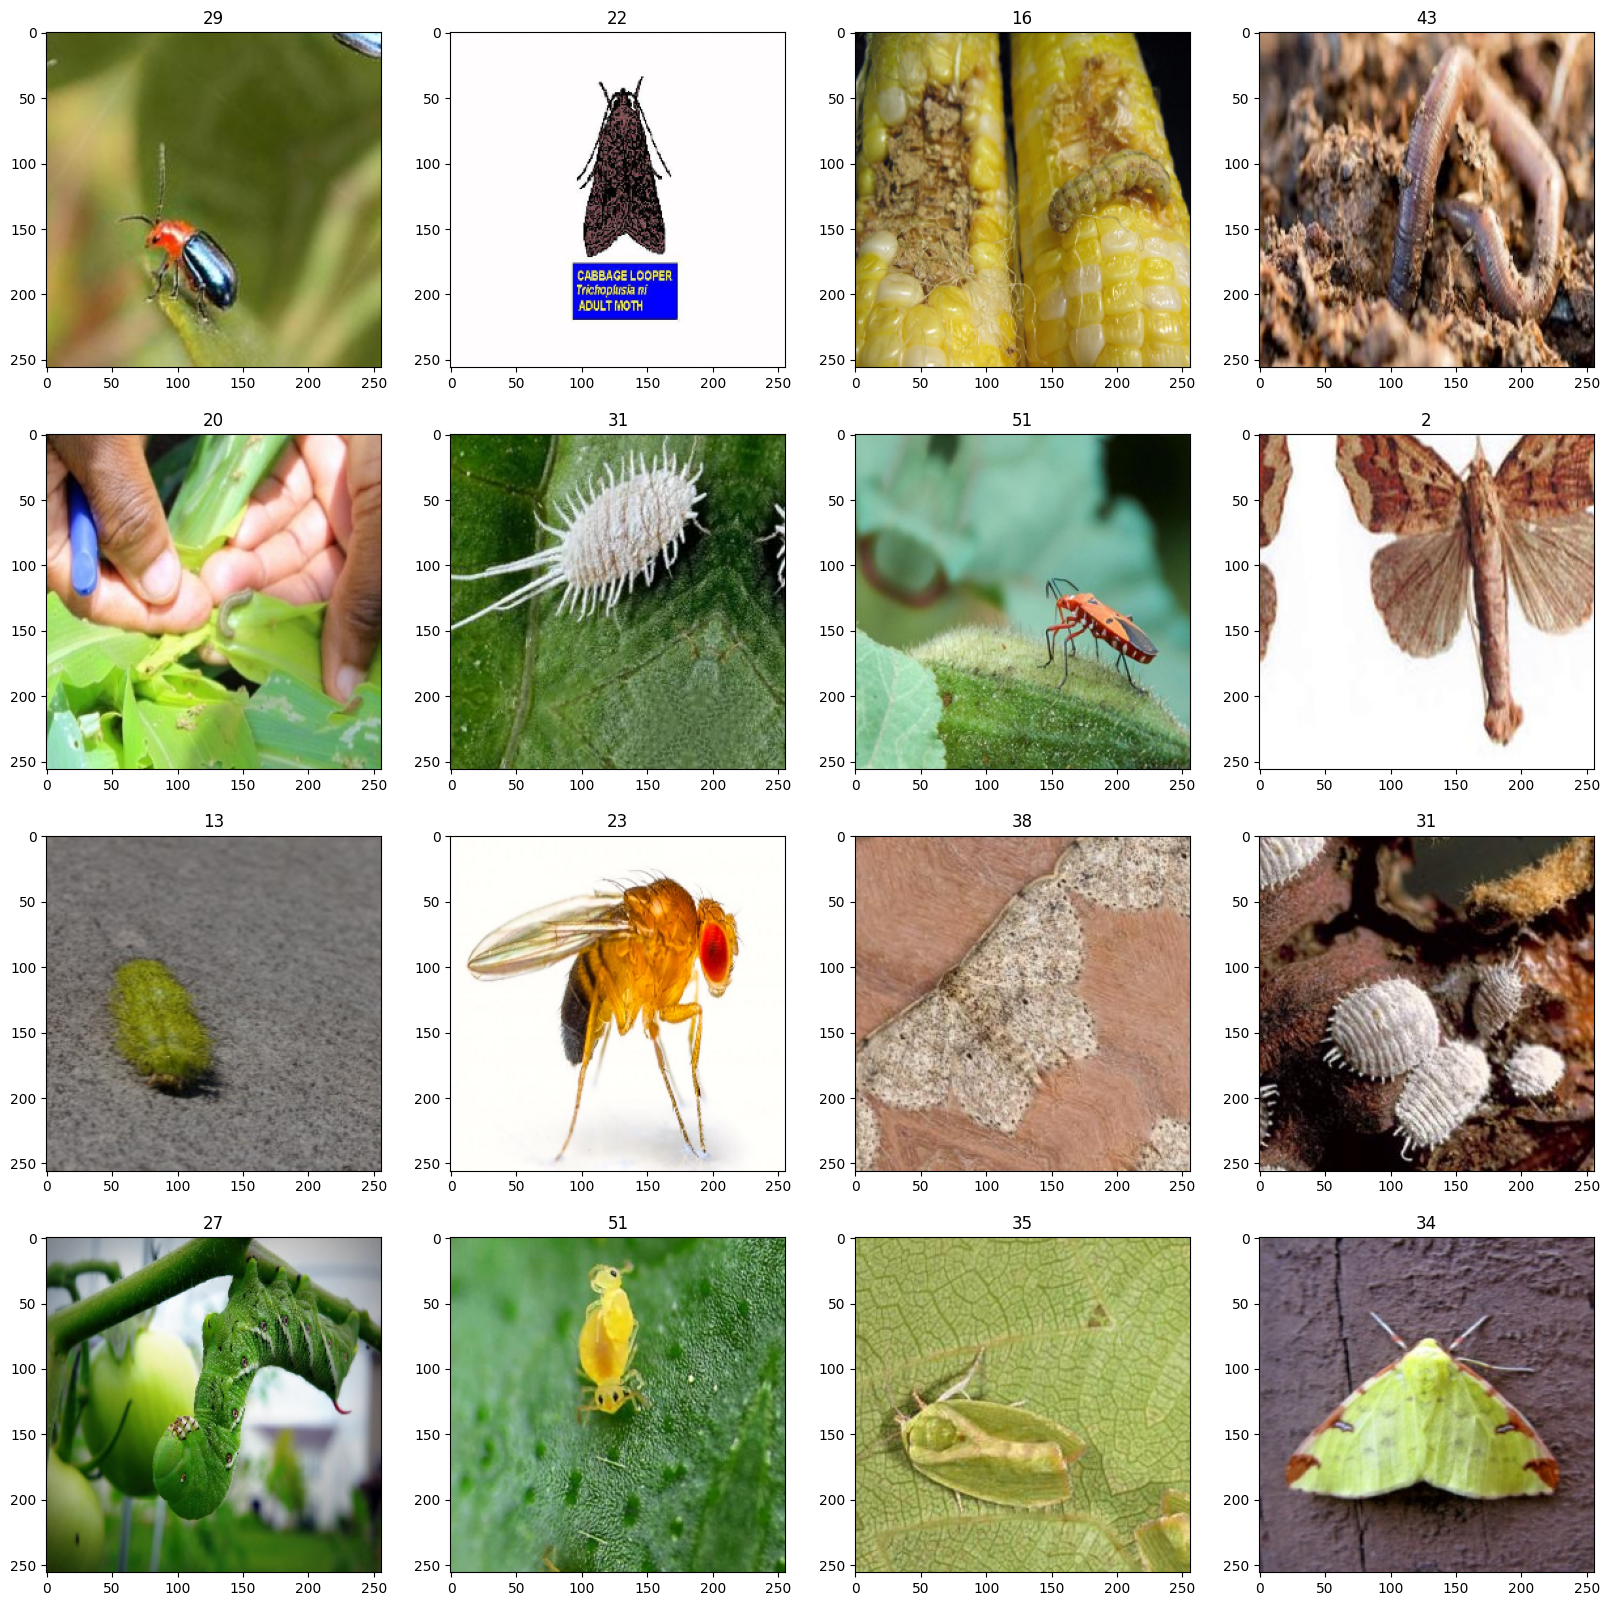

In [6]:
fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(20,20))
ax=ax.flatten()
for i,j in enumerate(train_images[:16]):
    ax[i].imshow(j)    #already in minimal scaled range
    ax[i].title.set_text(train_labels[i])

# Model Building

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

In [34]:
model=Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))  # Adding dropout for regularization

model.add(Dense(128, activation='relu'))  # Adding another dense layer
model.add(Dropout(0.1))  # Adding dropout for regularization

model.add(Dense(52, activation='softmax'))
# Compile the model

# Define a custom optimizer with a smaller initial learning rate
#custom_optimizer = Adam(learning_rate=0.01)

#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 16)      

# Model Training

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels), callbacks=[tensorboard_callback])

Epoch 1/20
129/129 [==============================] - 53s 335ms/step - loss: 3.9486 - accuracy: 0.0271 - val_loss: 3.9288 - val_accuracy: 0.0517
Epoch 2/20
129/129 [==============================] - 36s 274ms/step - loss: 3.7878 - accuracy: 0.0703 - val_loss: 3.6690 - val_accuracy: 0.1034
Epoch 3/20
129/129 [==============================] - 40s 314ms/step - loss: 3.1220 - accuracy: 0.2287 - val_loss: 3.5227 - val_accuracy: 0.1688
Epoch 4/20
129/129 [==============================] - 34s 262ms/step - loss: 1.9319 - accuracy: 0.4945 - val_loss: 4.1518 - val_accuracy: 0.1922
Epoch 5/20
129/129 [==============================] - 40s 313ms/step - loss: 1.0306 - accuracy: 0.7366 - val_loss: 4.9104 - val_accuracy: 0.1971
Epoch 6/20
129/129 [==============================] - 37s 291ms/step - loss: 0.5366 - accuracy: 0.8640 - val_loss: 6.2540 - val_accuracy: 0.1922
Epoch 7/20
129/129 [==============================] - 38s 292ms/step - loss: 0.3897 - accuracy: 0.8990 - val_loss: 6.8553 - val_ac

# Perfomance Visualization

In [36]:
vis=history.history #gives entire trained DL model info like loss,validation loss and accuracy
vis

{'loss': [3.948608875274658,
  3.787815809249878,
  3.1219520568847656,
  1.9319437742233276,
  1.0306397676467896,
  0.5366322994232178,
  0.3896963894367218,
  0.30352678894996643,
  0.28283756971359253,
  0.20524688065052032,
  0.15468907356262207,
  0.13382349908351898,
  0.12357614189386368,
  0.13970394432544708,
  0.12281706184148788,
  0.14461937546730042,
  0.13757672905921936,
  0.10125679522752762,
  0.08813934028148651,
  0.09059755504131317],
 'accuracy': [0.02709299512207508,
  0.07029534131288528,
  0.22870393097400665,
  0.49450817704200745,
  0.7366365790367126,
  0.8640468716621399,
  0.898950457572937,
  0.9226263165473938,
  0.9297046661376953,
  0.952160120010376,
  0.9572858214378357,
  0.9648523330688477,
  0.9628996849060059,
  0.9628996849060059,
  0.964120090007782,
  0.9567976593971252,
  0.9580180644989014,
  0.9668049812316895,
  0.966316819190979,
  0.9702221155166626],
 'val_loss': [3.928774118423462,
  3.6690032482147217,
  3.522711753845215,
  4.1518368

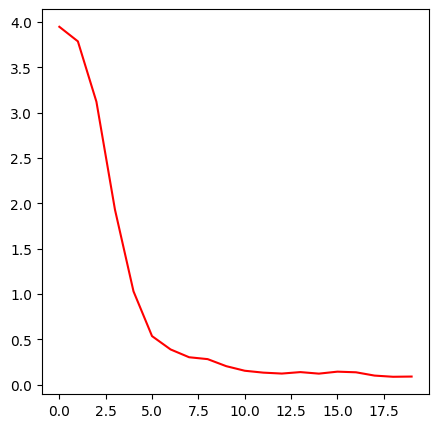

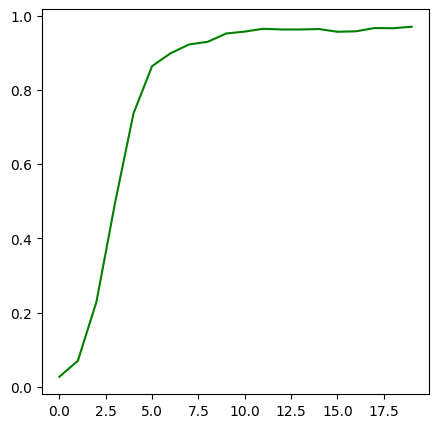

In [37]:
#<----PERFORMANCE------>

#LOSS VIZULATIZATION
plt.figure(figsize=(5,5))
plt.plot(vis['loss'],color="red",label="loss")
plt.plot(vis['val_loss'],color="blue",label="val_loss")
plt.show()

#ACCURACY VIZULIZATION
plt.figure(figsize=(5,5))
plt.plot(vis['accuracy'],color="green",label="accuracy")
plt.plot(vis['val_accuracy'],color="pink",label="val_accuracy")
plt.show()

# Accuracy Metrics

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained your model and obtained predictions
predictions = model.predict(train_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(train_labels, predicted_labels)
print("Accuracy:", accuracy*100,"%")

# Calculate precision
precision = precision_score(train_labels, predicted_labels, average='weighted')
print("Precision:", precision*100, "%")

# Calculate recall
recall = recall_score(train_labels, predicted_labels, average='weighted')
print("Recall:", recall*100, "%")

# Calculate F1 score
f1 = f1_score(train_labels, predicted_labels, average='weighted')
print("F1 Score:", f1*100,"%")


129/129 [==============================] - 18s 75ms/step
Accuracy: 98.2182084452038 %
Precision: 98.46826504037023 %
Recall: 98.2182084452038 %
F1 Score: 98.13702772110528 %


# Test Data

In [39]:
def load_data(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    for class_index, class_name in enumerate(class_names):
        class_path = os.path.join(folder, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            # Convert the color space from BGR to RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (256,256))
            images.append(image)
            labels.append(class_index)
    return images, labels

# Load and preprocess image data
test_images, test_labels = load_data('test_data')

In [40]:
# Convert lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Normalize pixel values to the range [0, 1]
test_images = test_images.astype('float32') / 255.0

# Print shapes for verification
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Test images shape: (520, 256, 256, 3)
Test labels shape: (520,)


# Test Accuracy

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained your model and obtained predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predicted_labels)

# Calculate precision
precision = precision_score(test_labels, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(test_labels, predicted_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(test_labels, predicted_labels, average='weighted')


print("Accuracy:", accuracy*100,"%")
print("Precision:", precision*100, "%")
print("Recall:", recall*100, "%")
print("F1 Score:", f1*100,"%")


17/17 [==============================] - 3s 69ms/step
Accuracy: 83.65384615384616 %
Precision: 85.36195754313162 %
Recall: 83.65384615384616 %
F1 Score: 83.7713987154614 %


# Unseen Prediction

In [42]:
from numpy import *
images_list=[]
prediction_list=[]

def pred(image_name):
    
    display=cv2.imread(image_name)
    display = cv2.cvtColor(display, cv2.COLOR_BGR2RGB)
    
    img=cv2.imread(image_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
    resize=cv2.resize(img,(256,256))
    print(resize.shape)

    #optimize the new image
    resize=resize/255
    #expand your image array
    img=expand_dims(resize,0)


    predictions = model.predict(img)

    # Convert the predicted probabilities to class labels
    predicted_labels = np.argmax(predictions, axis=1)
    print("The Sub Class detected in Breast Cancer is: ",classes[predicted_labels[0]])
    
    
    images_list.append(display)
    prediction_list.append(predicted_labels)

In [43]:
#loaded model prediticion
for i in range(1,5):
    pred('pic'+str(i)+'.jpg')

(256, 256, 3)
1/1 [==============================] - 0s 36ms/step
The Sub Class detected in Breast Cancer is:  Africanized Honey Bees (Killer Bees)
(256, 256, 3)
1/1 [==============================] - 0s 69ms/step
The Sub Class detected in Breast Cancer is:  Anaphe reticulata
(256, 256, 3)
1/1 [==============================] - 0s 50ms/step
The Sub Class detected in Breast Cancer is:  Anomis sabulifera
(256, 256, 3)
1/1 [==============================] - 0s 48ms/step
The Sub Class detected in Breast Cancer is:  Ants


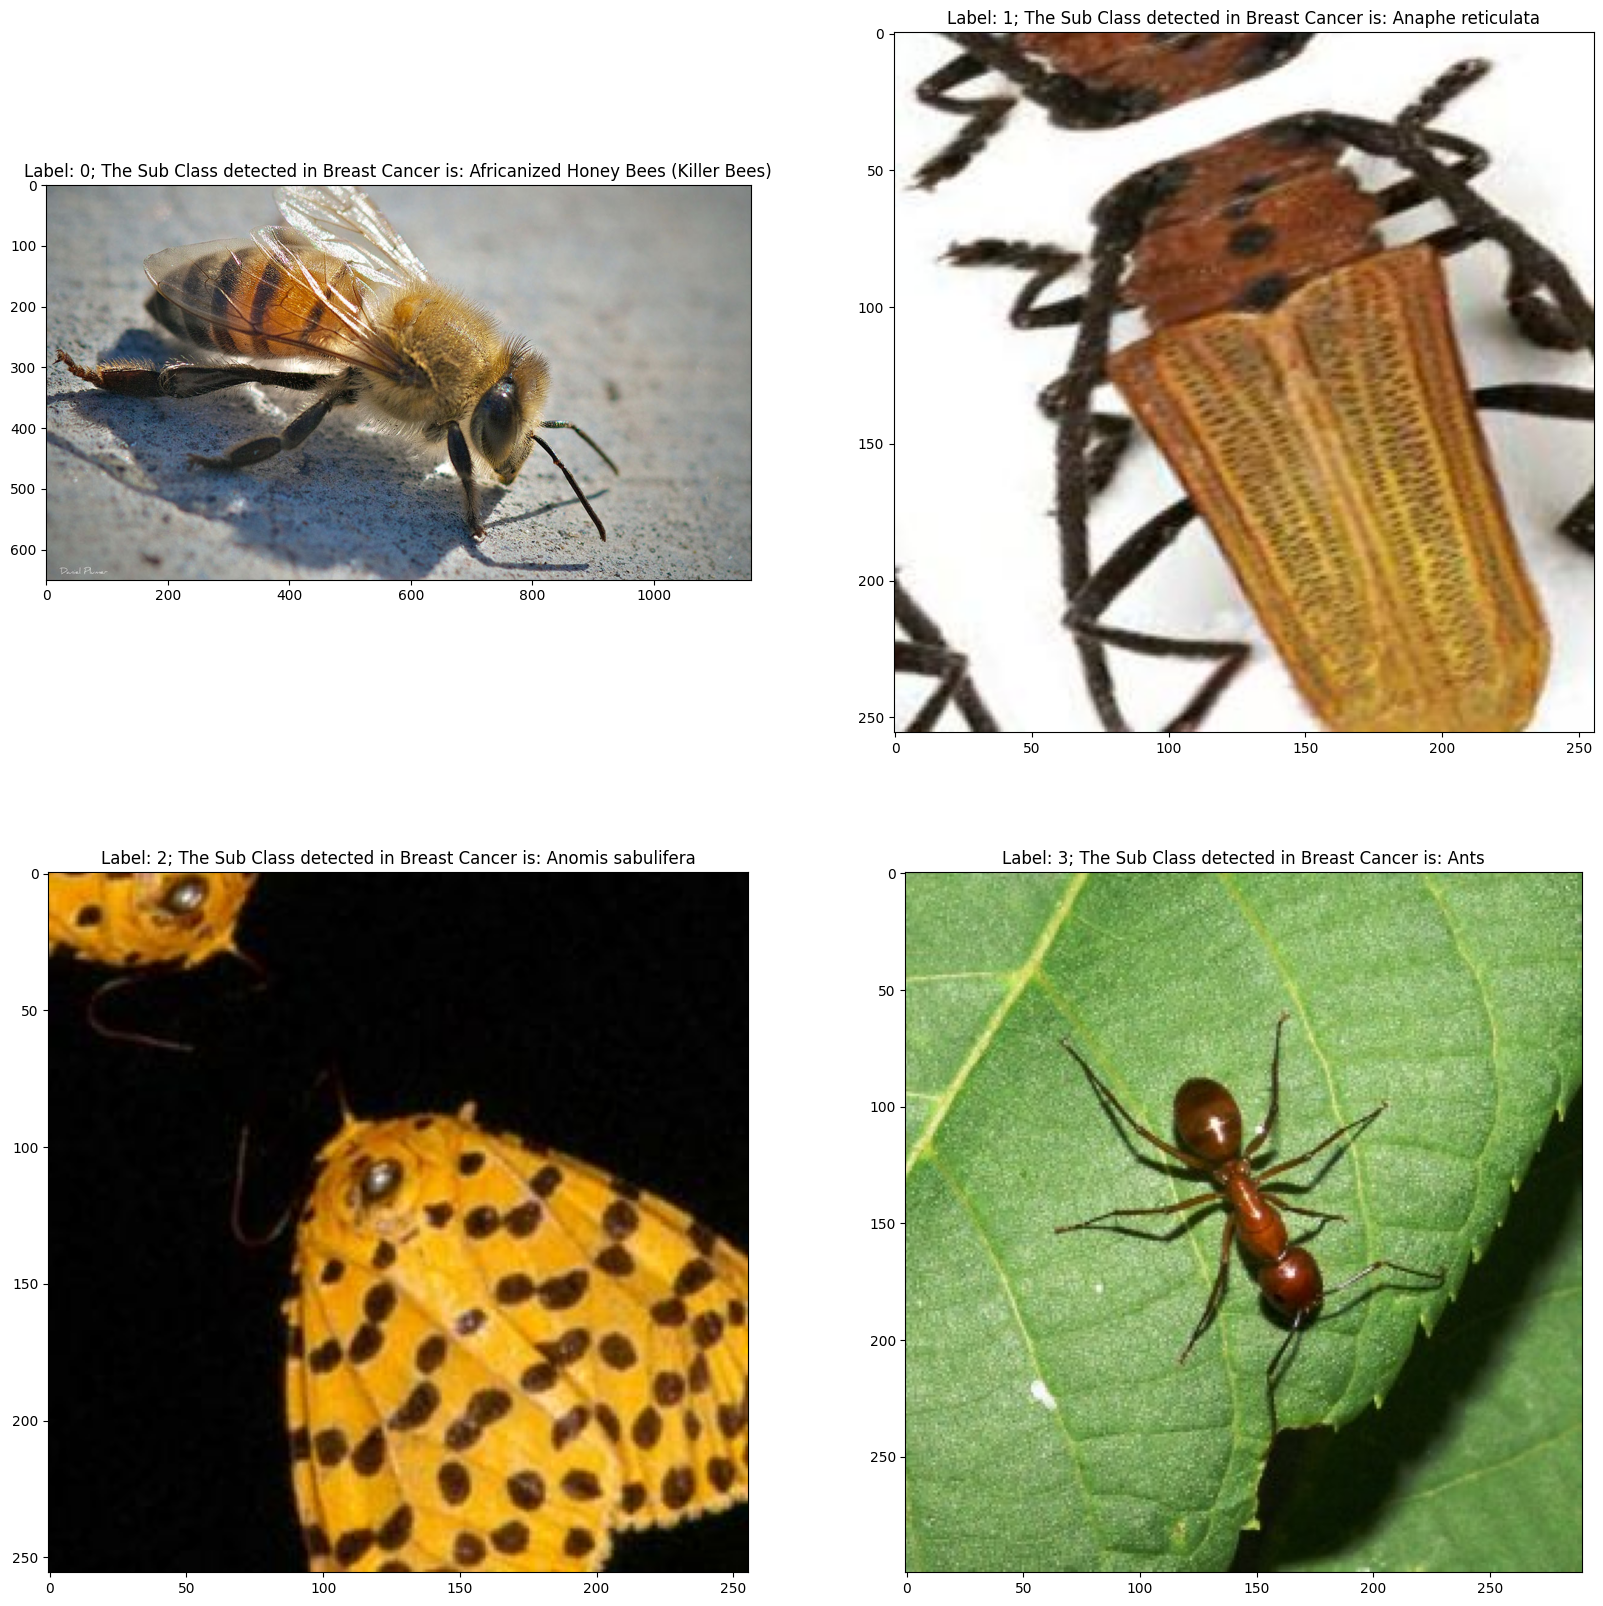

In [44]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(20,20))
ax=ax.flatten()
for i,j in enumerate(images_list[:4]):
    ax[i].imshow(j) #already in minimal scaled range
    ax[i].title.set_text("Label: "+str(prediction_list[i][0])+"; The Sub Class detected in Breast Cancer is: "+str(classes[prediction_list[i][0]]))   

# Saving The Model

In [46]:
model.save('pest.keras')